# 18APR23 In Class Exercise

Module: Selection\
Topic: Simulating selection in `msprime` and `SLiM`.

In [1]:
# Import modules.
import numpy as np
from matplotlib import pyplot as plt
import msprime

## Selective Sweeps

First we will look at the effects of selective sweeps—ie the process of a beneficial mutation and the flanking linked sites _sweeping_ to fixation. Let's first exam the nuetral case with an `msprime` simulation below.

In [2]:
# Intialize the simulation parameters.
Ne = 10_000 # Effective population size.
L = 50e6 # Sequence length of 50 Mb.
r = 2e-9 # Per generation recombination rate.
n = 20 # Number of samples.

In [3]:
# Simulate a nuetral example.
ts_neutral = msprime.sim_ancestry(
    samples=n,
    model=[msprime.StandardCoalescent()],
    population_size=Ne,
    recombination_rate=r,
    sequence_length=L,
    random_seed=42,
)
# Show the tree-sequence summary.
ts_neutral

Next, we will split the simulated genome into 10 kb windows and calculate nucleotide diveristy (ie $\pi$). You might be asking yourself "How does one calculate nucleotide diversity without simulating mutations?" and the answer is simply from the tree-sequence! It is not terribly important to understand exactly how this is accomplished, but if you are interested you can read more [here](https://tskit.dev/tutorials/no_mutations.html#do-you-really-need-mutations).

In [4]:
# Intialize the starting poistion for each window.
windows = np.arange(0, L+10_000, 10_000)
# Compute nucelotide diversity in windows.
pi_neutral = ts_neutral.diversity(windows=windows, mode='branch')

Now, let's visualize nucleotide diversity across our simulated genomes!

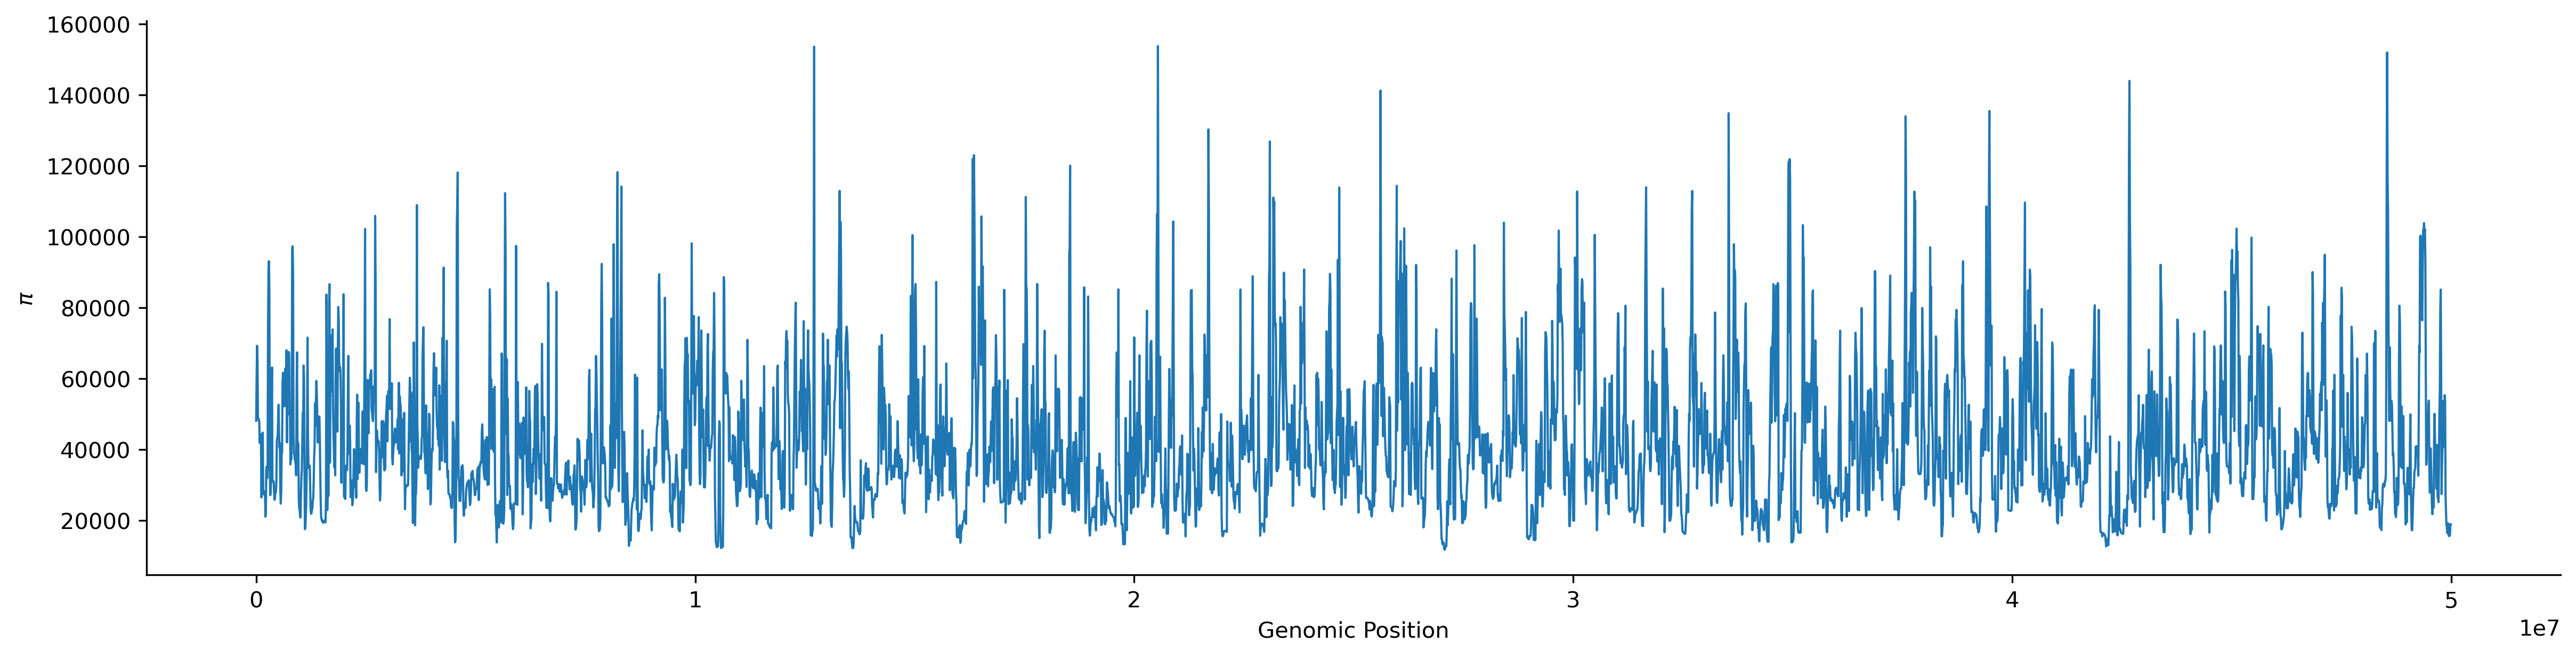

In [5]:
# Intialize the figure.
fig = plt.figure(figsize=(16, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the windowed diversity results.
ax.plot(
    windows[:-1], pi_neutral,
    linewidth=1, color='tab:blue',
)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
plt.xlabel(r'Genomic Position')
plt.ylabel(r'$\pi$')
# Show!
plt.show()

We will now simulate a selective sweep using `msprime`! Before running the code below please read the [selective sweep section](https://tskit.dev/msprime/docs/stable/ancestry.html#selective-sweeps) to understand what is going on under the hood. In the simulation below we will place a beneficial _de novo_ mutation—ie a new mutation at a frequency of $\frac{1}{2N_{e}}$—in the middle of our 50 Mb genomic sequence and will stop the selective sweep when there is only one copy of the ancestral allele. Lastly, we will assume an additive fitness model with a selection coefficent of $s=0.05$.

In [6]:
# Define a selective sweep model.
selective_sweep = msprime.SweepGenicSelection(
    position=(L / 2), # Position of the benficial mutation.
    start_frequency=(1 / (2 * Ne)), # Intial frequency of the beneficial mutation.
    end_frequency=(1 - (1 / (2 * Ne))), # Final frequency of the beneficial mutation.
    s=0.05, # Selection coefficient. 
    dt=(1 / (40 * Ne)) # Time step increment for the slective sweep.
)

In [7]:
# Simulate a selection example.
ts_sweep = msprime.sim_ancestry(
    samples=n,
    model=[selective_sweep,msprime.StandardCoalescent()], # Simulate the sweep first then neutrality.
    population_size=Ne,
    recombination_rate=r,
    sequence_length=L,
    random_seed=42,
)
# Show the tree-sequence summary.
ts_sweep

Next, we calculate diversity in windows for our simulation with selection!

In [8]:
# Intialize the starting poistion for each window.
windows = np.arange(0, L+10_000, 10_000)
# Compute nucelotide diversity in windows.
pi_sweep = ts_sweep.diversity(windows=windows, mode='branch')

Now it is time to plot! Before running the cell below consider how the plot with a selective sweep would be different from the neutral case. Discuss your thoughts with your partner and if you are confused ask your instructor for help!

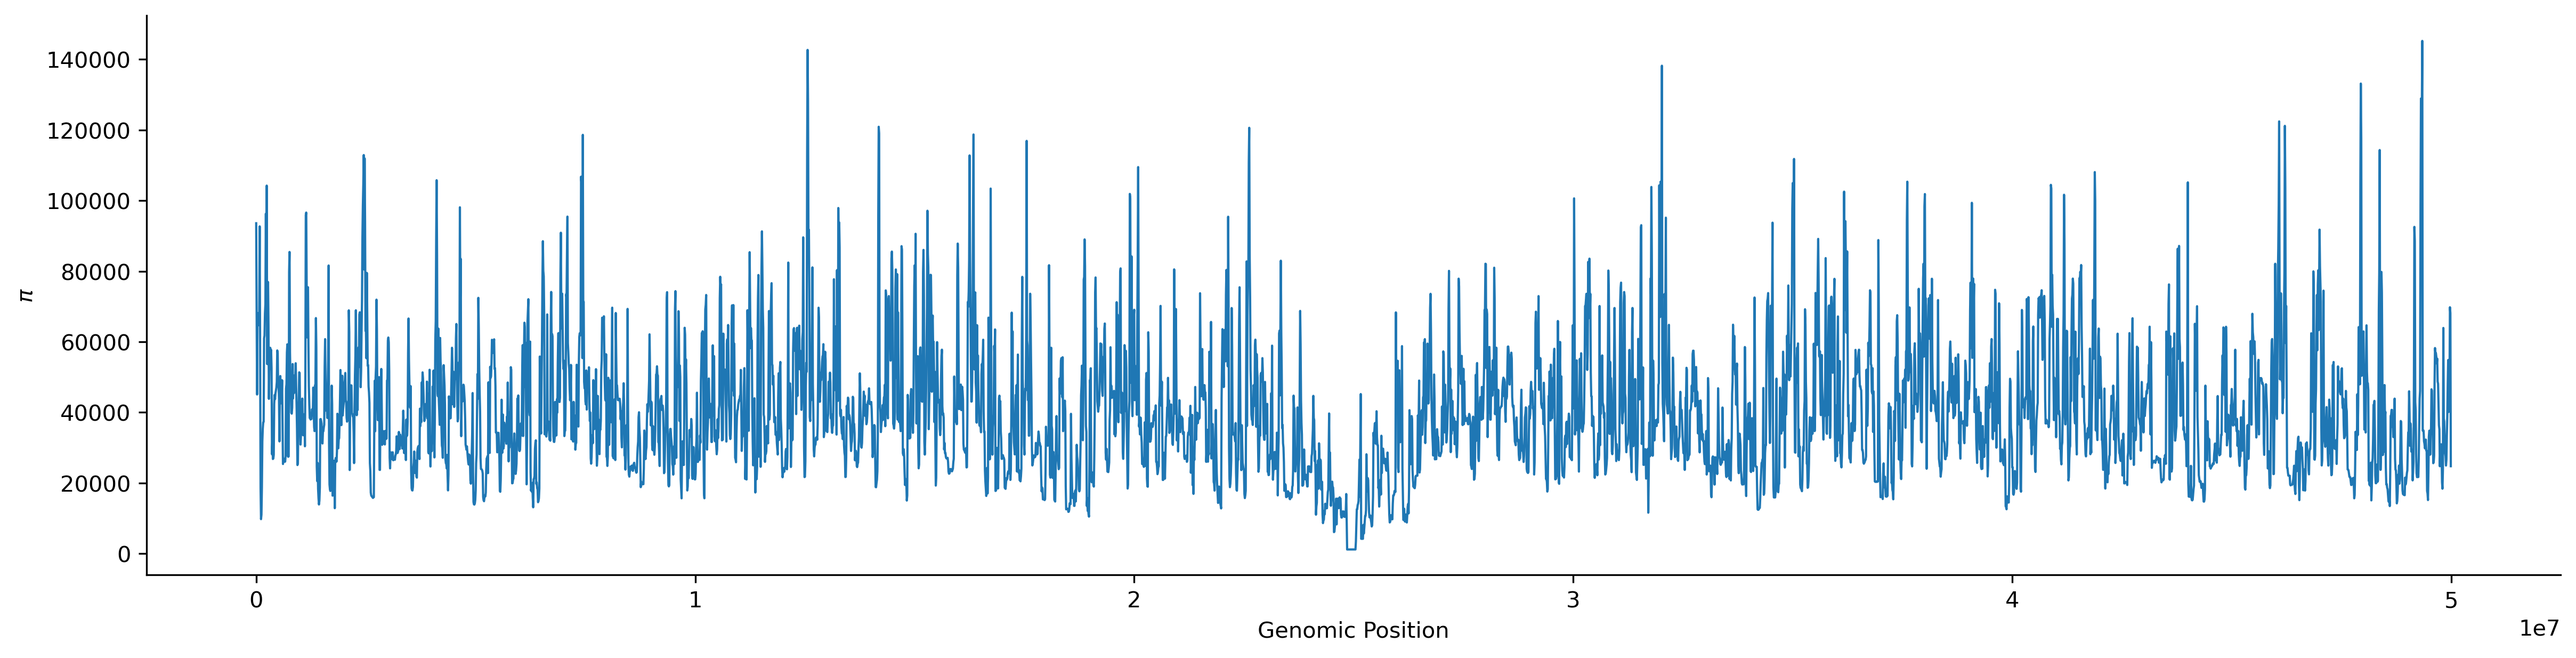

In [9]:
# Intialize the figure.
fig = plt.figure(figsize=(16, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the windowed diversity results.
ax.plot(
    windows[:-1], pi_sweep,
    linewidth=1, color='tab:blue',
)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
plt.xlabel(r'Genomic Position')
plt.ylabel(r'$\pi$')
# Show!
plt.show()

What do you notice is different between the two plots? To make things crystal clear let's plot the diversity in windows on top of the neutral case.

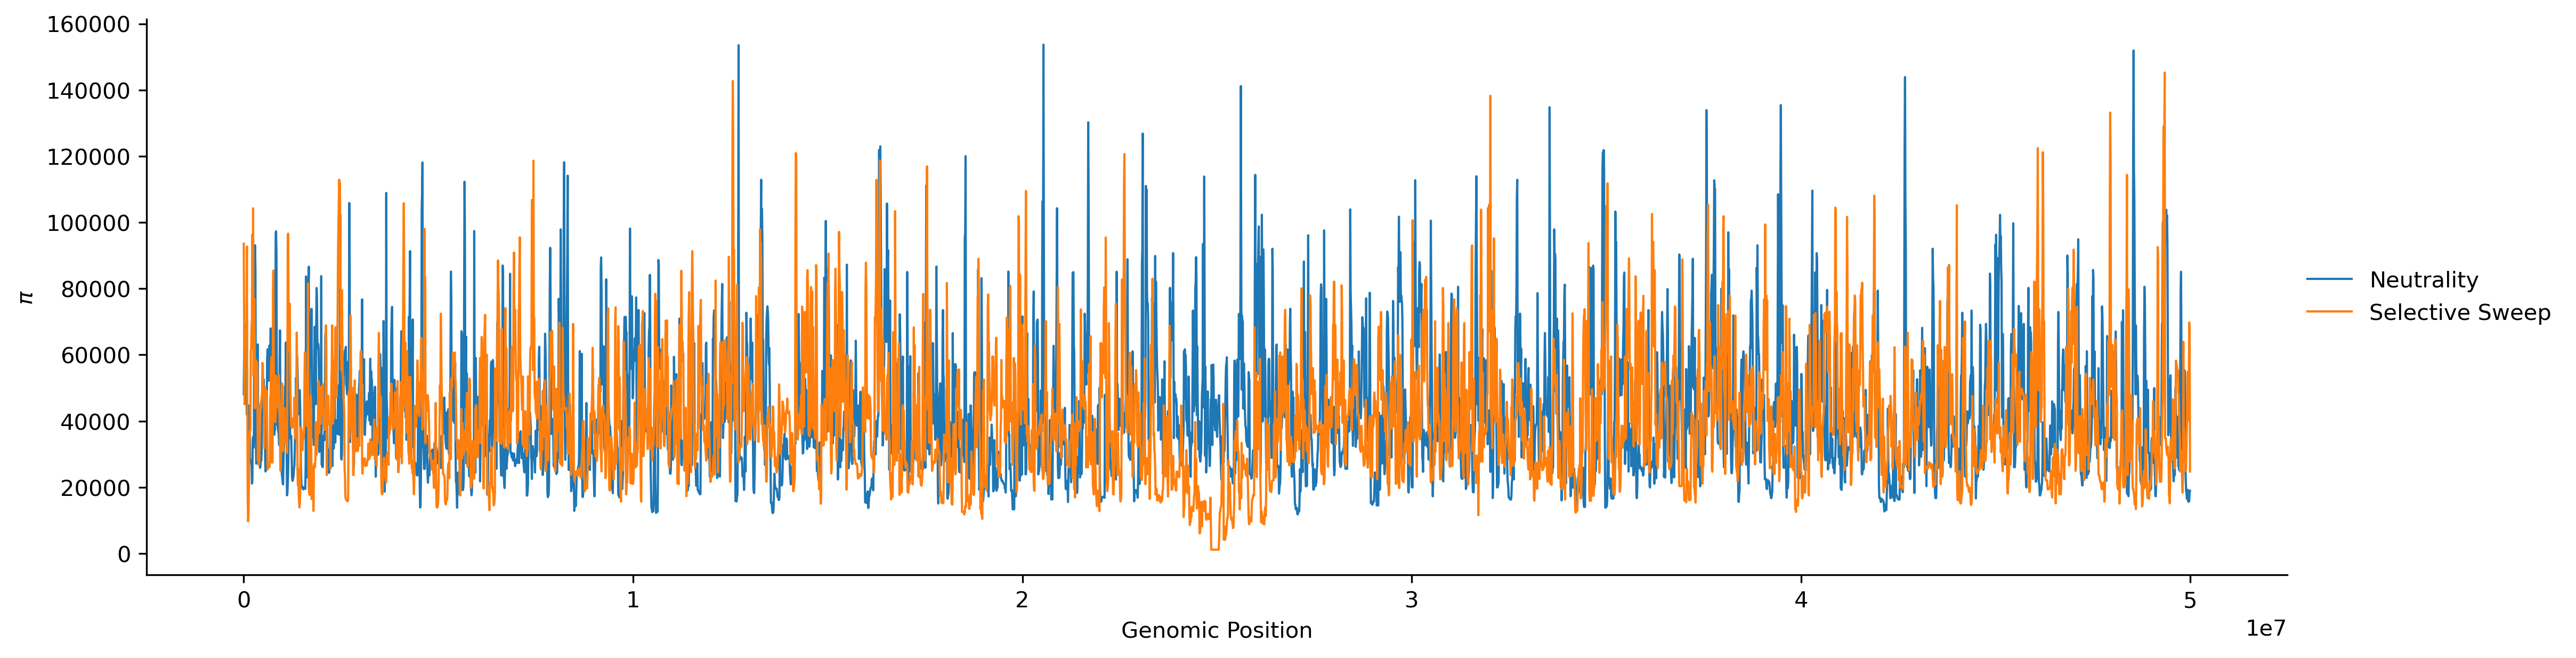

In [10]:
# Intialize the figure.
fig = plt.figure(figsize=(16, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the neutral windowed diversity results.
ax.plot(
    windows[:-1], pi_neutral,
    linewidth=1, color='tab:blue',
    label='Neutrality',
)
# Plot the selective sweep windowed diversity results.
ax.plot(
    windows[:-1], pi_sweep,
    linewidth=1, color='tab:orange',
    label='Selective Sweep',
)
# Add a figure legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
plt.xlabel(r'Genomic Position')
plt.ylabel(r'$\pi$')
# Show!
plt.show()

In the beginning of the semester we discussed how the shape of the SFS is informative about the evolutionary history of a population. Using the tree-sequences we just simulated let's compute the derived allele frequency spectrum from each simulation.

In [11]:
# Extract the derived allele frequency spectrums from the simulations.
sfs_neutral = ts_neutral.allele_frequency_spectrum(polarised=True, mode='branch')
sfs_sweep = ts_sweep.allele_frequency_spectrum(polarised=True, mode='branch')

Now before plot think about how the two derived allele frequency spectrums should look? Should they look identical? Should they look completely different? Would we expect portions of the SFS to differ, and if so what portions? Use your intution about what is happening during a selective sweep—ie we have a reduction in diversity due to alleles increasing in frequency. Discuss your thoughts with your partner and ask your instructor for help if you are totally confused!

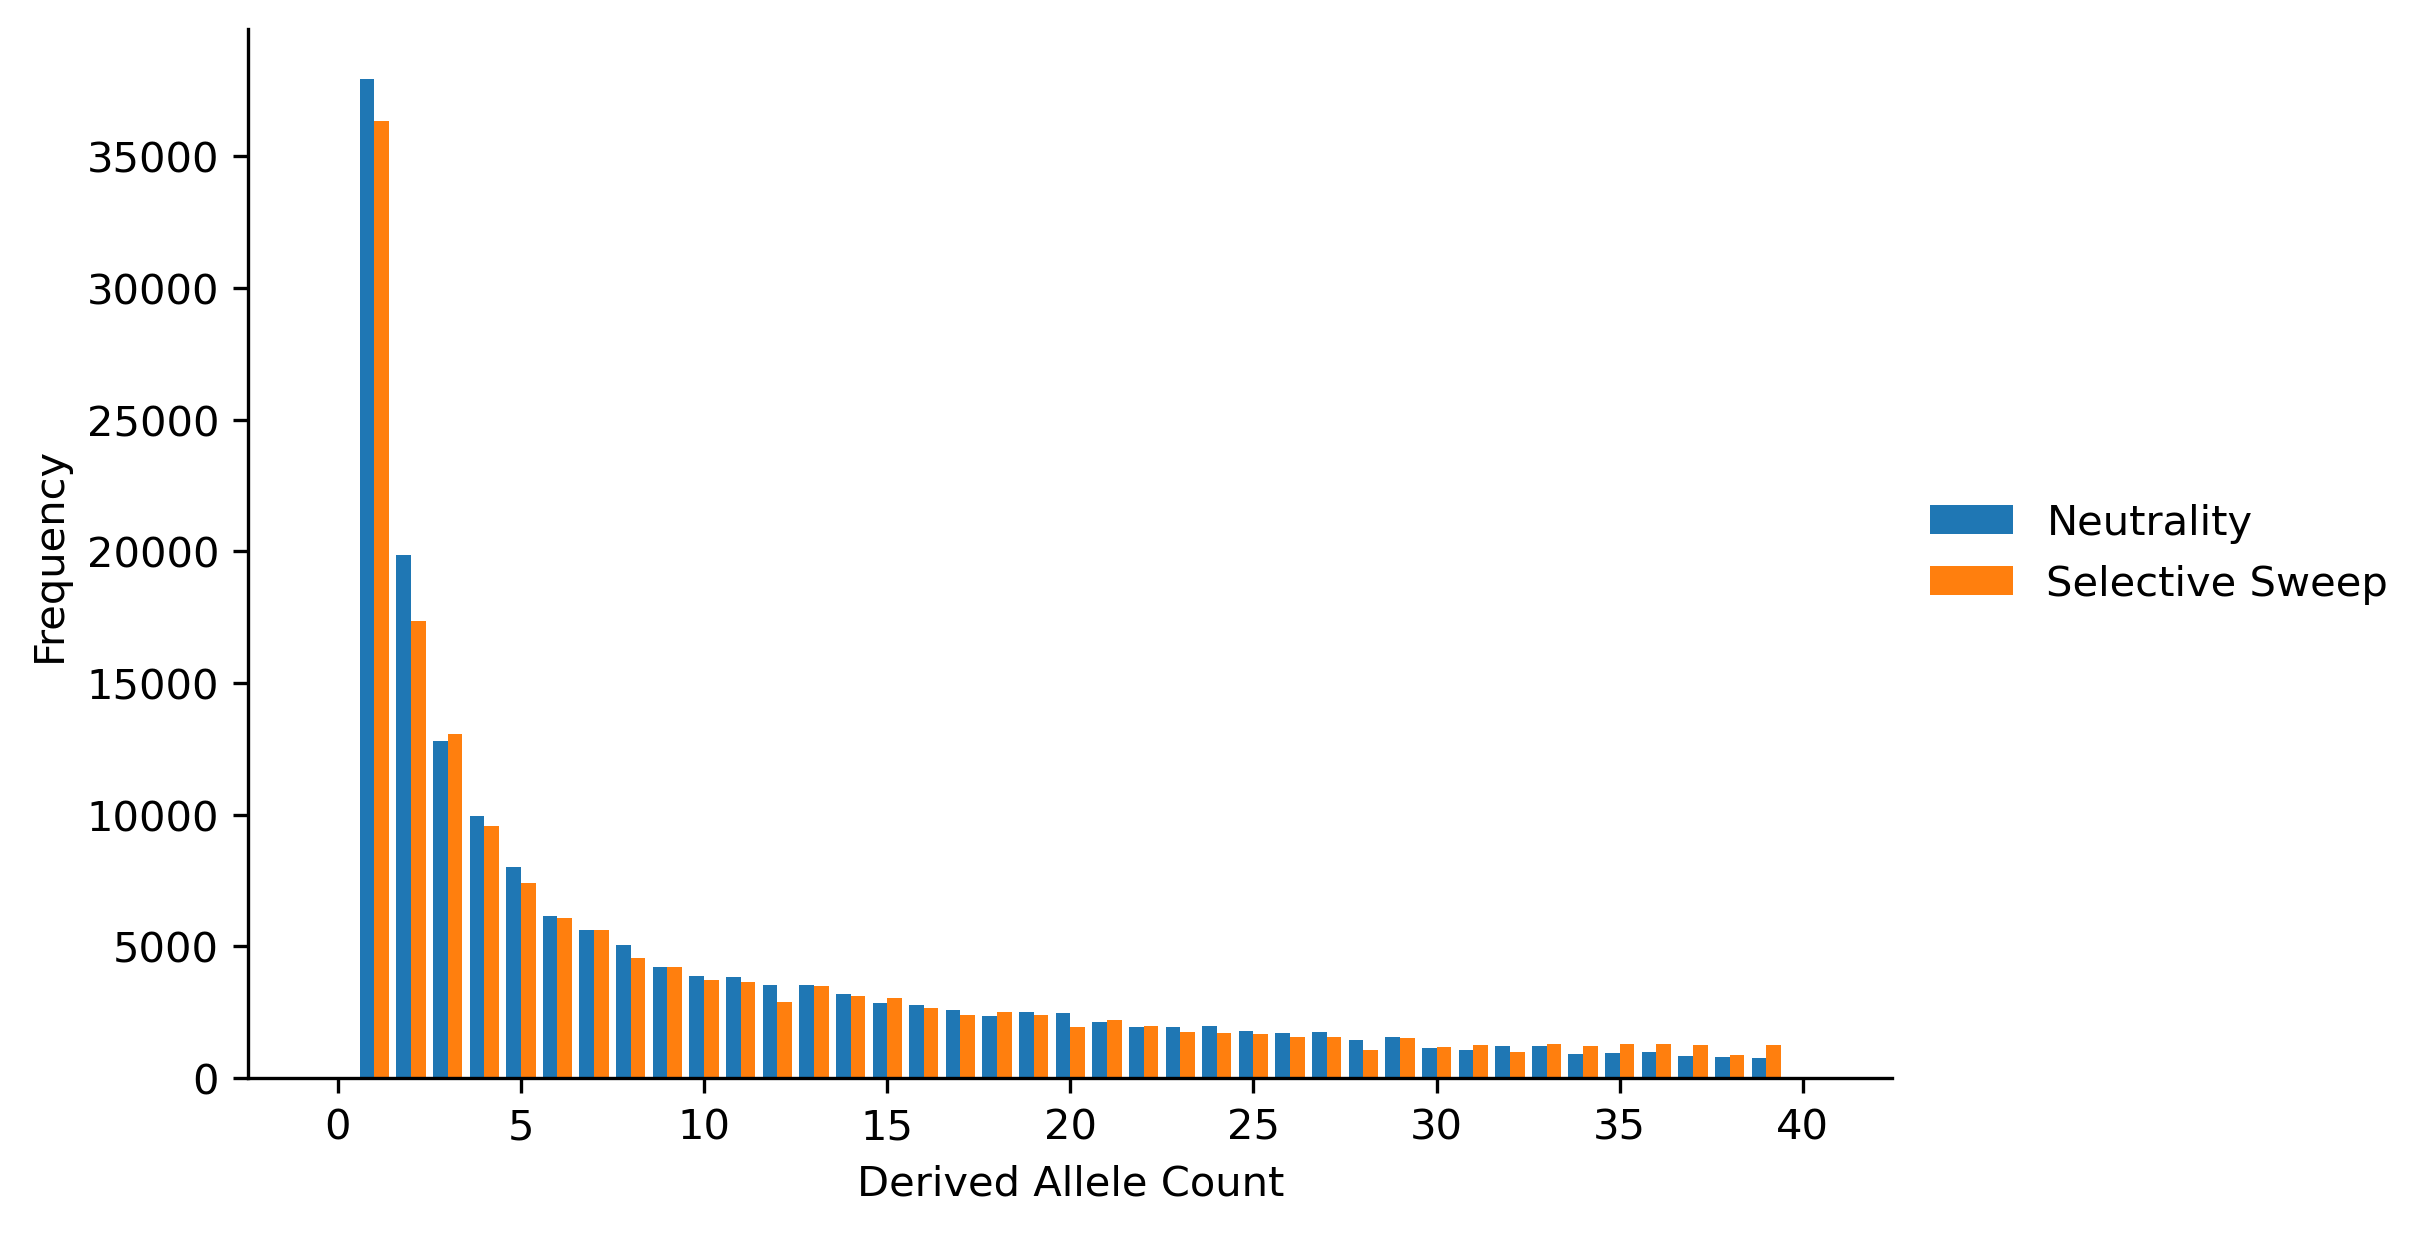

In [12]:
# Intialize the center positions.
center_pos = np.arange((n * 2) + 1)
# Intialize the positions for the neutral and selective sweep bars.
neutral_pos = center_pos - 0.2
sweep_pos = center_pos + 0.2
# Intialize the figure.
fig = plt.figure(figsize=(8, 4), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the neutral sfs.
ax.bar(
    neutral_pos, sfs_neutral,
    width=0.4, color='tab:blue',
    label='Neutrality',
)
# Plot the selective sweep sfs.
ax.bar(
    sweep_pos, sfs_sweep,
    width=0.4, color='tab:orange',
    label='Selective Sweep',
)
# Add a figure legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Set the x-axis ticks and labels.
ax.set_xticks(np.arange(0, (n * 2) + 1, 5))
ax.set_xticklabels(np.arange(0, (n * 2) + 1, 5).astype(str))
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
plt.xlabel('Derived Allele Count')
plt.ylabel('Frequency')
# Show!
plt.show()

Where do you see the differences between the nuetral and selective sweep simulations? Does this make sense? Once you are able to convince yourself of what is going on move on to the next section, otherwise ask your instructor for help!

## Selection, Recombination, and Introgression

Using the forward in time simulator `SLiM` I went ahead and recreated some results from one of my recent favorite papers [Veller et al, 2020](https://doi.org/10.1093/evolut/qpad021)—__NOTE:__ forward in time simulations can be quite slow so I went ahead an ran all the _SLiMulations_ before hand, but if you are interested to see how I did so you can log on to `OSCAR` and navigate to `/gpfs/data/biol1435/code_and_data_for_students/veller_et_al_2020`. Each simulation starts off with an intial pulse of introgression resulting in an introgression proportion of 5% in the first generation. Introgressed alleles are distributed amongsth a genome consisting of 10,000 evenly dispersed loci where introgressed alleles are deleterious at 1,000 loci evenly dispersed throughout the genome. The simulations assume additive fitness effects within and across loci—ie an individuals relative fitness corresponds to the proportion of deleterious introgressed alleles. Lastly, for each simulation I tracked the introgression proportion in the population for 2,000 generations. These simulations correspond to a model of genetic load where introgressed alleles are either effectively neutral or delterious in the recipients genome. To highlight the interplay between selection, recombination, and introgression I simulated 100 replicates using a recombination map for Humans and for _Drosophila_ where we assume ~1 recombination event per chromosome. Let's first start out by loading the recombination maps and visualizing them.

In [13]:
# Read in the human linkage maps.
human_female_map = np.loadtxt('../data/Human_Female_10kLoci.txt.gz')
human_male_map = np.loadtxt('../data/Human_Male_10kLoci.txt.gz')
# Read in the drosophila linkage maps.
dros_female_map = np.loadtxt('../data/Dmel_Female_10kLoci.txt.gz')
dros_male_map = np.loadtxt('../data/Dmel_Male_10kLoci.txt.gz')
# Average the maps.
human_avg_map = (human_female_map + human_male_map) / 2
dros_avg_map = (dros_female_map + dros_male_map) / 2
# Create 10,000 loci.
loci = np.arange(1, 10_001)

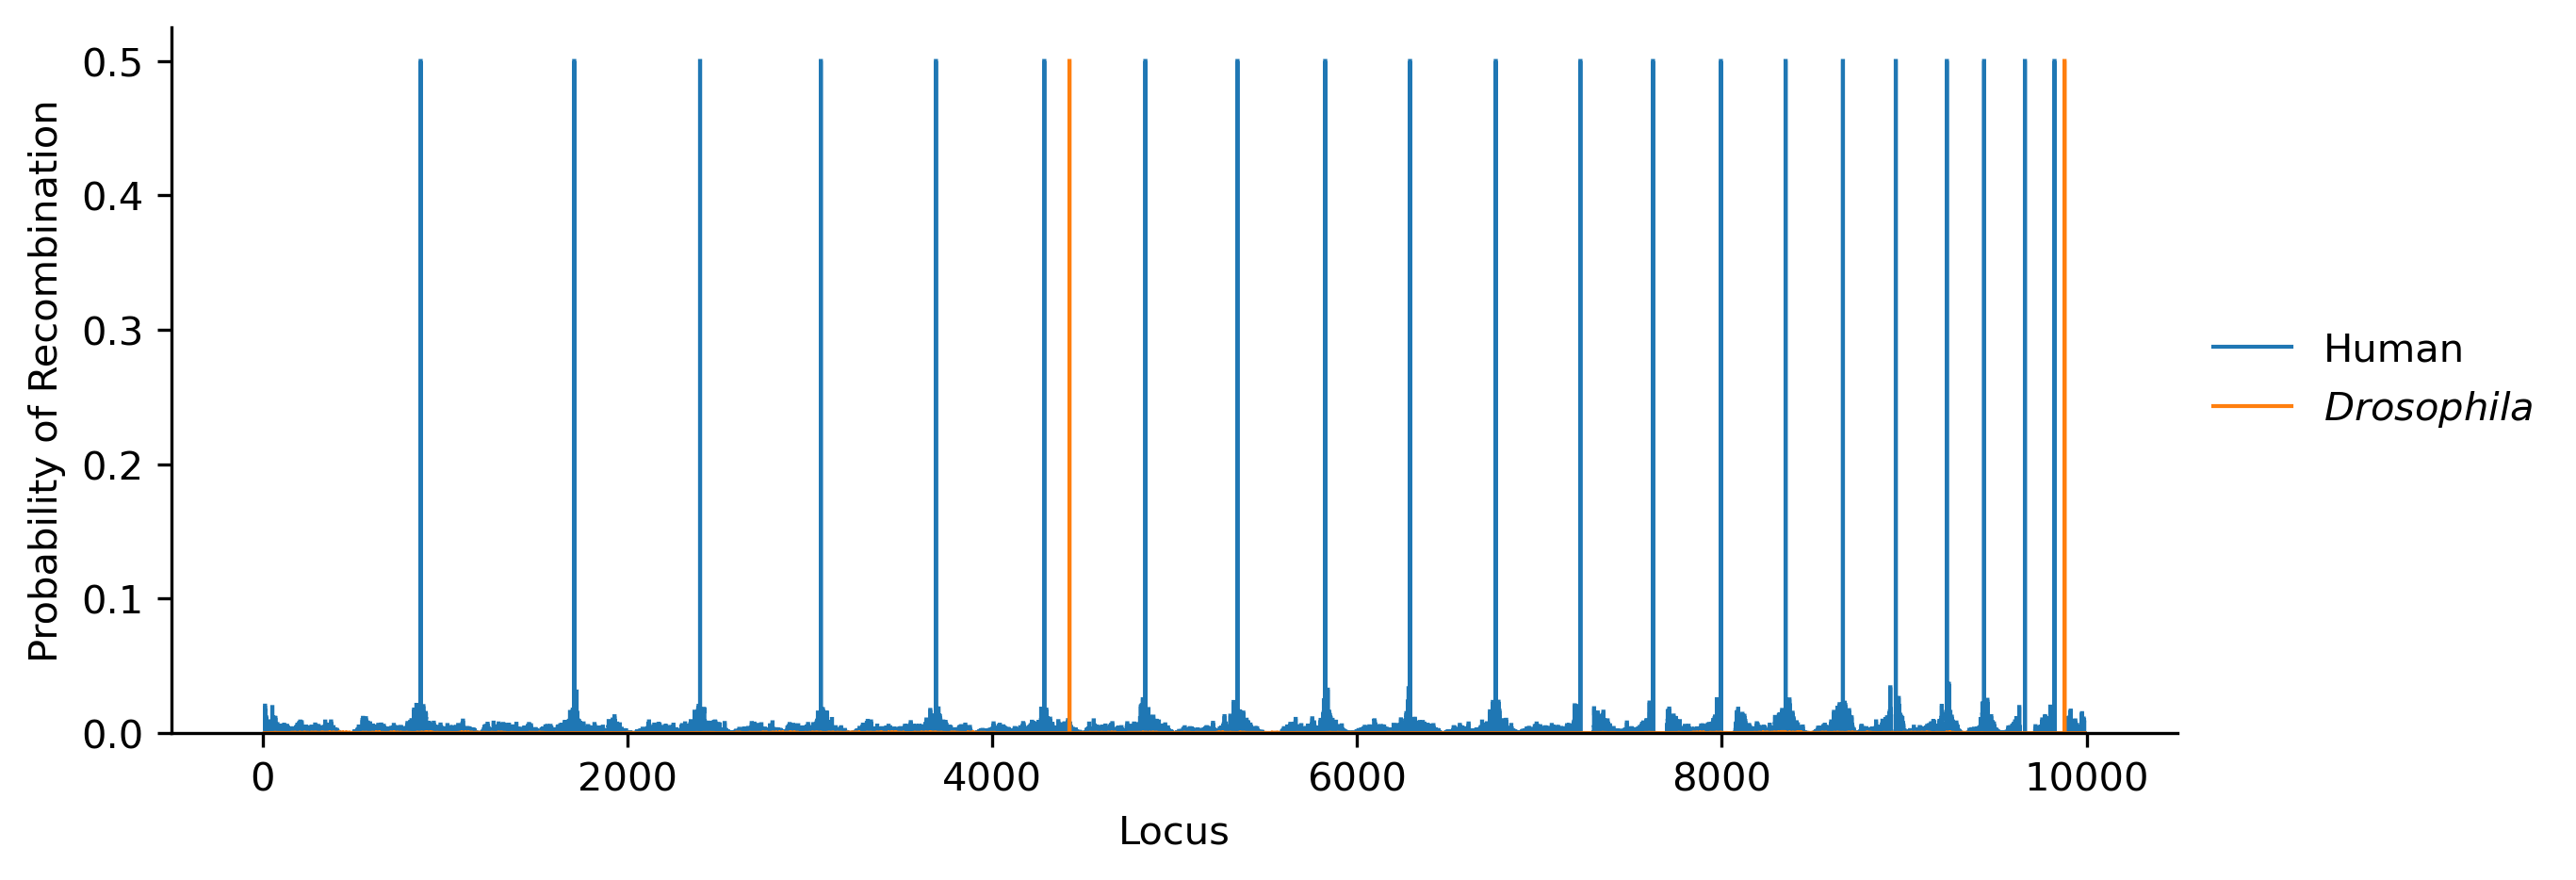

In [14]:
# Intialize the figure.
fig = plt.figure(figsize=(9, 3), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the linkage maps.
ax.stairs(
    human_avg_map, loci,
    color='tab:blue', label='Human',
)
ax.stairs(
    dros_avg_map, loci,
    color='tab:orange', label=r'$Drosophila$',
)
# Add a figure legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
plt.xlabel('Locus')
plt.ylabel('Probability of Recombination')
# Show!
plt.show()

From the plot above we can see that Humans have 22 autosomes and _Drosophila_ have 2 major autosomes. Thus we would expect ~22 and ~2 crossover events per meiosis in Humans and _Drosophila_ respectively. It is important to remember that recombination is what breaks up the introgressed material into smaller blocks. Let's now define a function to load the simulated results and subsequently load them.

__NOTE: After the first time you run the cell below comment it out to avoid getting future errors—ie you only need to ever unzip once!!!__

In [15]:
#%%bash
#unzip -d ./data ./data/slim_outputs.zip

In [16]:
# Define a function to load the simulated results.
def load_slim_results(species):
    # Intialize results matricies.
    neutral_mat = np.empty((100, 2000))
    selection_mat = np.empty((100, 2000))
    # Intialize a path to the resulsts.
    path = f'../data/slim_outputs/{species}OverallIntrogressedFraction'
    # For all 100 replicates...
    for rep in range(0, 100):
        # Fill the results matricies.
        neutral_mat[rep, :] = np.loadtxt(path+f'Neutral_{rep+1}.csv.gz')
        selection_mat[rep, :] = np.loadtxt(path+f'Selected_{rep+1}.csv.gz')
    return neutral_mat, selection_mat

In [17]:
# Load the human results.
human_neu_mat, human_sel_mat = load_slim_results('Human')
# Load the drosophila results.
dros_neu_mat, dros_sel_mat = load_slim_results('Dmel')

Next, we will plot the trajectories for non-neutral loci, but before we do what do you expect the trajectories to look like? What differences—if any—do you expect to see between Humans and _Drosophila_? Let's plot to find out!

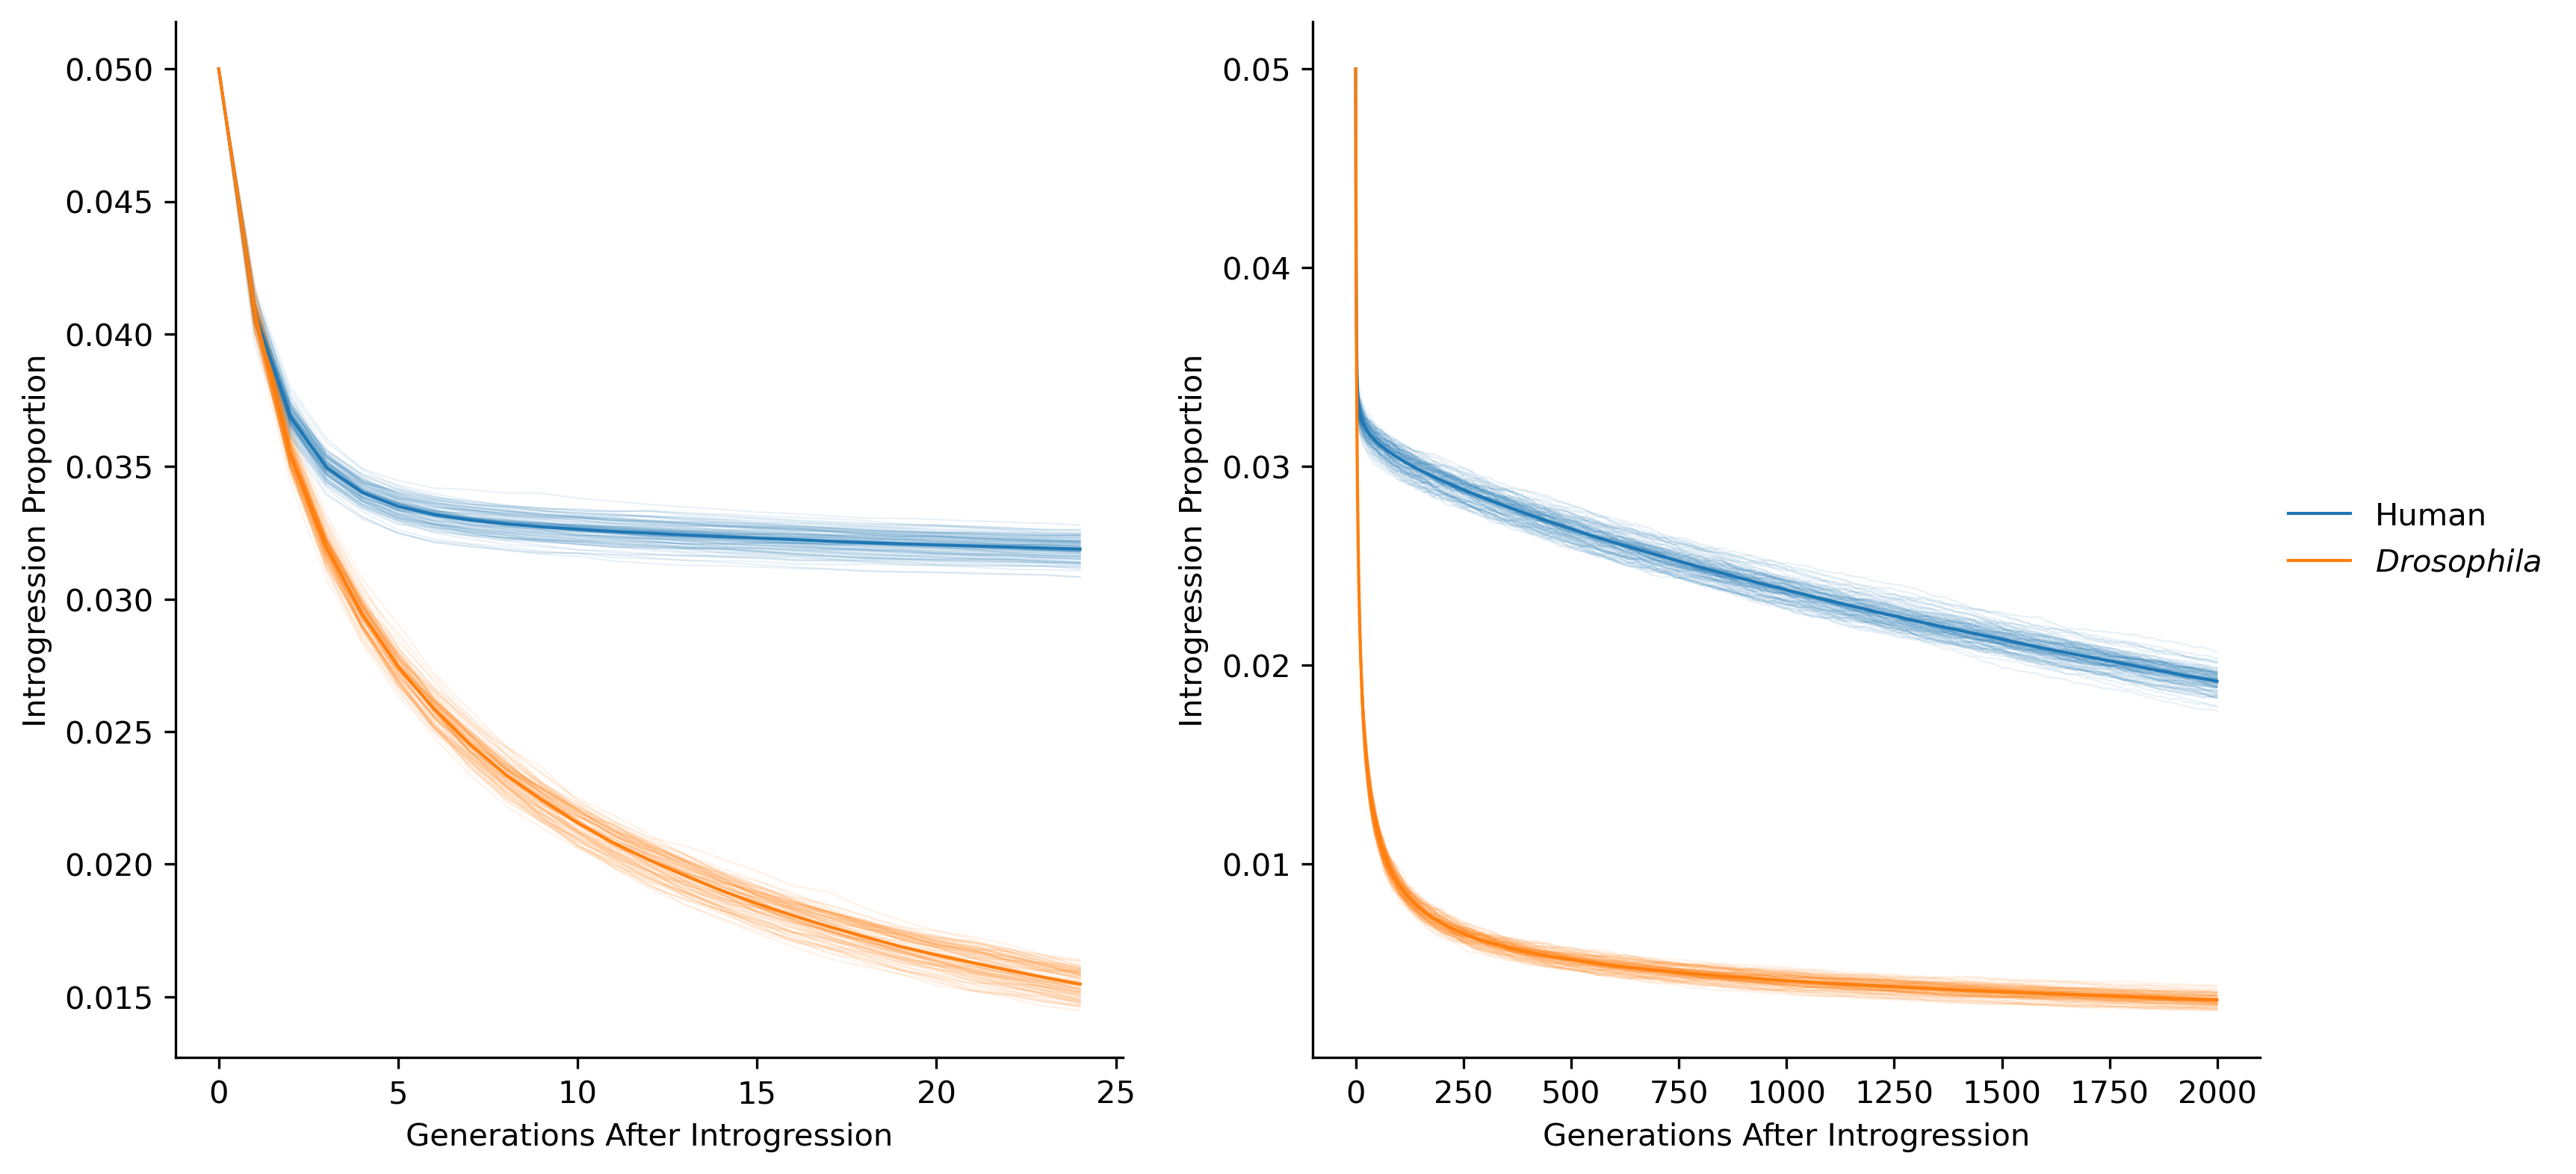

In [18]:
# Intialize the figure and axes.
fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), dpi=300,
    sharex=False, sharey=False,
)
# Plot the trajectories for the first 25 generations.
axes[0].plot(
    human_sel_mat.T[:25, :], color='tab:blue',
    linewidth=0.5, alpha=0.1,
)
axes[0].plot(
    dros_sel_mat.T[:25, :], color='tab:orange',
    linewidth=0.5, alpha=0.1,
)
# Plot the simulated means for the first 25 generations.
axes[0].plot(
    np.mean(human_sel_mat[:, :25], axis=0), color='tab:blue',
    linewidth=1,
)
axes[0].plot(
    np.mean(dros_sel_mat[:, :25], axis=0), color='tab:orange',
    linewidth=1,
)
# Plot the trajectories.
axes[1].plot(
    human_sel_mat.T, color='tab:blue',
    linewidth=0.5, alpha=0.1,
)
axes[1].plot(
    dros_sel_mat.T, color='tab:orange',
    linewidth=0.5, alpha=0.1,
)
# Plot the simulated means.
axes[1].plot(
    np.mean(human_sel_mat, axis=0), color='tab:blue',
    linewidth=1, label='Human',
)
axes[1].plot(
    np.mean(dros_sel_mat, axis=0), color='tab:orange',
    linewidth=1, label=r'$Drosophila$',
)
# Add a figure legend.
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# For every axes...
for i in range(2):
    # Despine the axes.
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Label the axes.
    axes[i].set_xlabel('Generations After Introgression')
    axes[i].set_ylabel('Introgression Proportion')
# Show!
plt.show()

The left plot shows the purging of introgressed ancestry in the early generations and the left plot shows the purging of introgressed ancestry for all 2,000 generations. _Drosophila_ purges delterious introgressed ancestry more rapidly in the earlier generations due to the fact that there is less recombination! This results in longer blocks of deleterious introgressed ancestry resulting in a higher variance in fitness—remember selection is more efficient with increasing variance in fitness! After this intial purging of introgressed ancestry, the purging of introgressed ancestry in later gnerations is largely determined by fine scale patterns of recombination, which is why the _Drosophila_ trajectories level off while Humans do not! Now let's plot the trajectories for the nuetral loci in our simulations, but before we do, do we expect the neutral loci plots to look compared to the selected loci plot? 

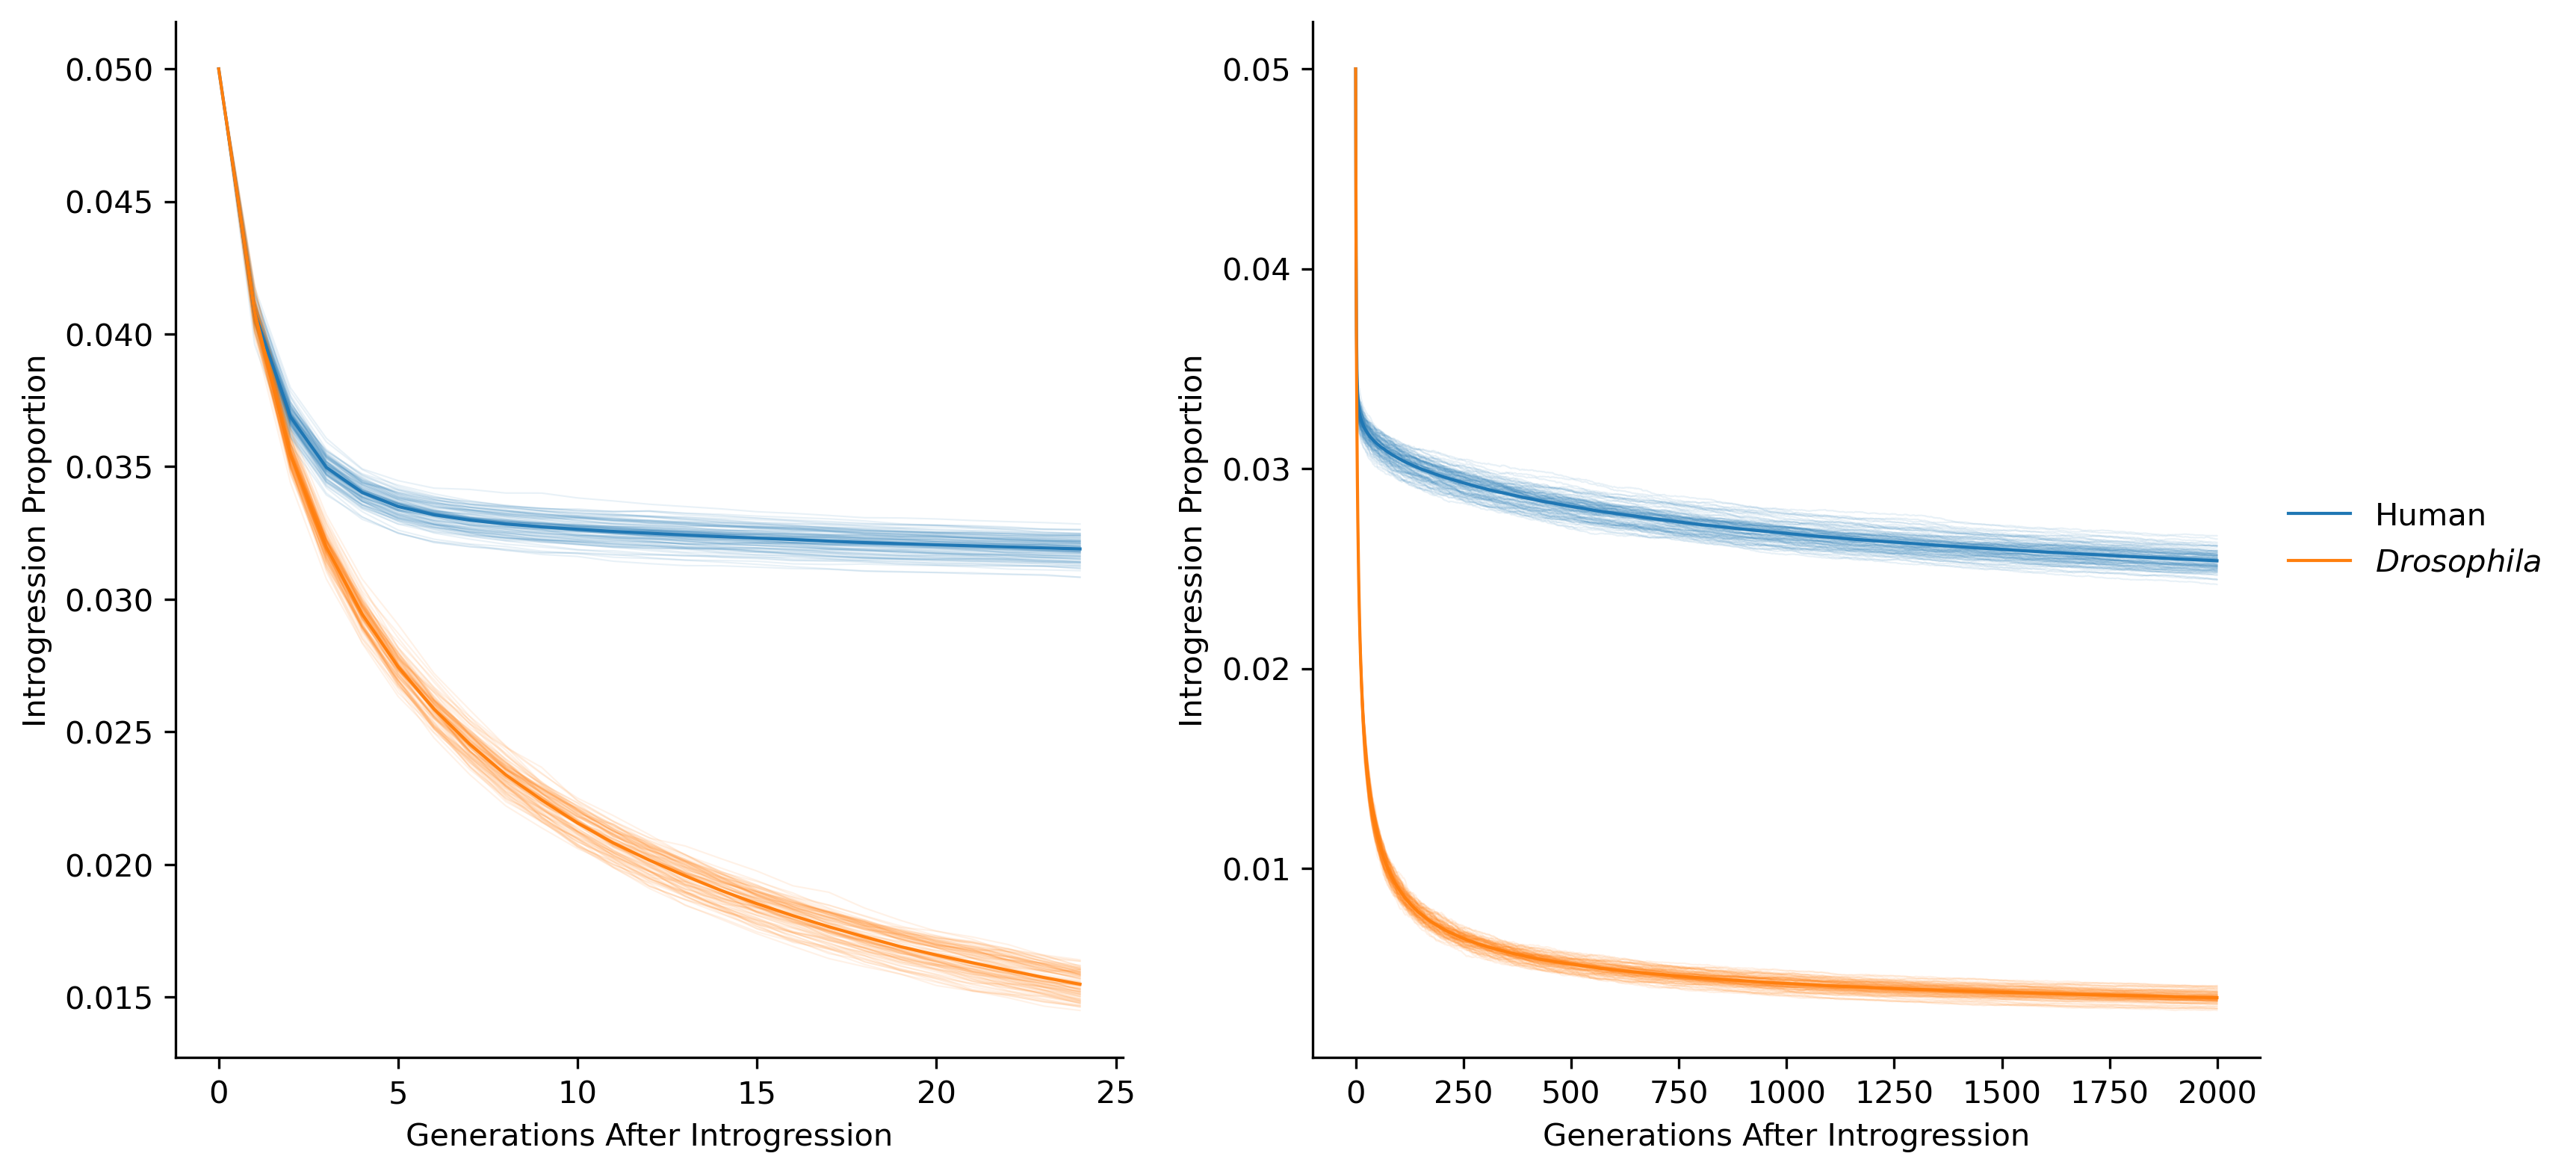

In [19]:
# Intialize the figure and axes.
fig, axes = plt.subplots(
    1, 2, figsize=(12, 6), dpi=300,
    sharex=False, sharey=False,
)
# Plot the trajectories for the first 25 generations.
axes[0].plot(
    human_neu_mat.T[:25, :], color='tab:blue',
    linewidth=0.5, alpha=0.1,
)
axes[0].plot(
    dros_neu_mat.T[:25, :], color='tab:orange',
    linewidth=0.5, alpha=0.1,
)
# Plot the simulated means for the first 25 generations.
axes[0].plot(
    np.mean(human_neu_mat[:, :25], axis=0), color='tab:blue',
    linewidth=1,
)
axes[0].plot(
    np.mean(dros_neu_mat[:, :25], axis=0), color='tab:orange',
    linewidth=1,
)
# Plot the trajectories.
axes[1].plot(
    human_neu_mat.T, color='tab:blue',
    linewidth=0.5, alpha=0.1,
)
axes[1].plot(
    dros_neu_mat.T, color='tab:orange',
    linewidth=0.5, alpha=0.1,
)
# Plot the simulated means.
axes[1].plot(
    np.mean(human_neu_mat, axis=0), color='tab:blue',
    linewidth=1, label='Human',
)
axes[1].plot(
    np.mean(dros_neu_mat, axis=0), color='tab:orange',
    linewidth=1, label=r'$Drosophila$',
)
# Add a figure legend.
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# For every axes...
for i in range(2):
    # Despine the axes.
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    # Label the axes.
    axes[i].set_xlabel('Generations After Introgression')
    axes[i].set_ylabel('Introgression Proportion')
# Show!
plt.show()

Perhaps, surpsingly, the neutral loci traectories mirror the selected loci trajectories! This is due to the fact that when there are sufficiently many deleterious alleles introduced to the recipient population they are in linkage disequlibrium with many neutral introgressed alleles. This linkage results in neutral introgressed alleles to be purged with the deleterious alleles they are in linkage disequlibrium with! In fact the plot below shows that the average trajectories are the same for many generations!

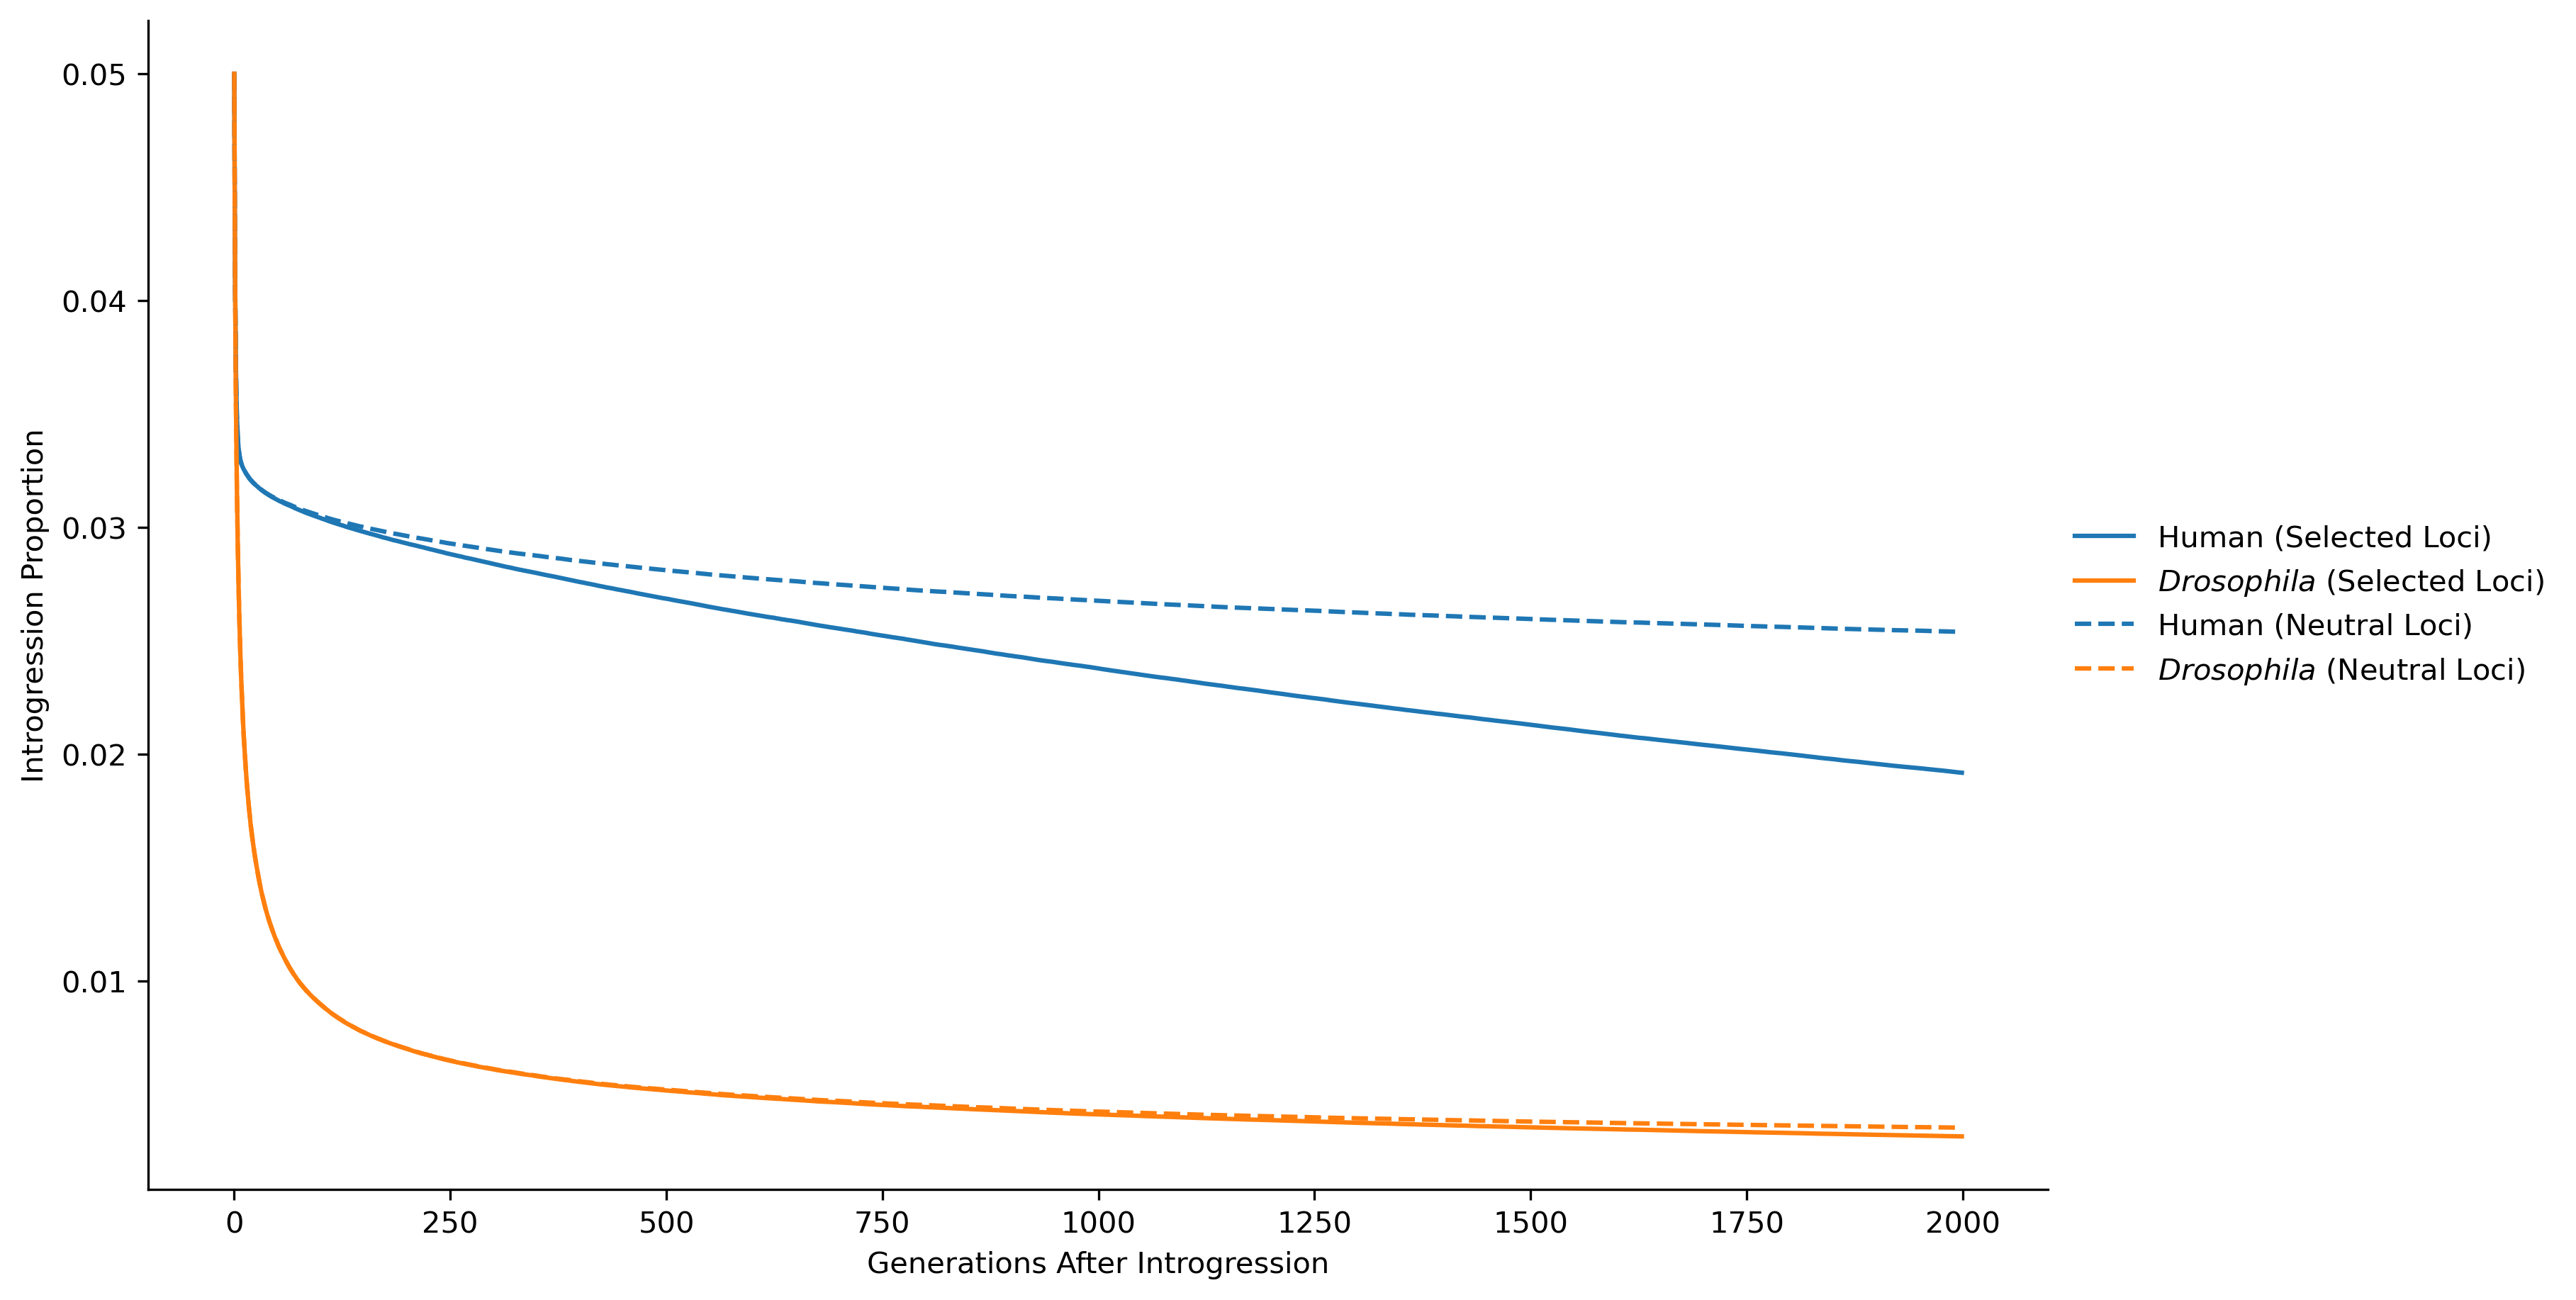

In [20]:
# Intialize the figure.
fig = plt.figure(figsize=(12, 6), constrained_layout=True, dpi=300)
# Intialize the axes.
ax = fig.add_subplot(111)
# Plot the results for the selcted loci.
ax.plot(
    np.mean(human_sel_mat, axis=0), color='tab:blue',
    linestyle='solid', label='Human (Selected Loci)',
)
ax.plot(
    np.mean(dros_sel_mat, axis=0), color='tab:orange',
    linestyle='solid', label=r'$Drosophila$ (Selected Loci)',
)
# Plot the results for the neurtal loci.
ax.plot(
    np.mean(human_neu_mat, axis=0), color='tab:blue',
    linestyle='dashed', label='Human (Neutral Loci)',
)
ax.plot(
    np.mean(dros_neu_mat, axis=0), color='tab:orange',
    linestyle='dashed', label=r'$Drosophila$ (Neutral Loci)',
)
# Add a figure legend.
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False)
# Despine the axes.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Label the axes.
plt.xlabel('Generations After Introgression')
plt.ylabel('Introgression Proportion')
# Show!
plt.show()